In [1]:
import numpy as np
import math
import sys
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [2]:
def euclidean_distance(x1, x2):
    """ Calculates the l2 distance between two vectors """
    distance = 0
    # Squared distance between each coordinate
    for i in range(len(x1)):
        distance += pow((x1[i] - x2[i]), 2)
    return math.sqrt(distance)

distance = euclidean_distance([22.5, 67.2],[10.5,45.6])
print(distance)

24.709512338368803


This function generate the random set of centers from data

In [3]:
def get_random_centroids(X,k):
        """ Initialize the centroids as k random samples of X"""
        n_samples, n_features = np.shape(X)
        print("{}x{}".format(n_samples, n_features))
        centroids = np.zeros((k, n_features))
        for i in range(k):
            centroid = X[np.random.choice(range(n_samples))]
            centroids[i] = centroid
        return centroids

centroids = get_random_centroids(iris.data, 3)
centroids

150x4


array([[5.5, 2.4, 3.8, 1.1],
       [6.3, 2.8, 5.1, 1.5],
       [6.8, 3. , 5.5, 2.1]])

In [4]:
def get_closest_centroid(sample, centroids):
    """ Return the index of the closest centroid to the sample """
    closest_i = 0
    closest_dist = float('inf')#infinite
    for i, centroid in enumerate(centroids):
        distance = euclidean_distance(sample, centroid)
        if distance < closest_dist:
            closest_i = i
            closest_dist = distance
    return closest_i

In [5]:
 def create_clusters(centroids, X,k):
        """ Assign the samples to the closest centroids to create clusters """
        n_samples = np.shape(X)[0]
        #empty array of k clusters
        clusters = [[] for _ in range(k)]
        #foreach sample into the dataset
        for sample_i, sample in enumerate(X):
            #get the idx of the centroide
            centroid_i = get_closest_centroid(sample, centroids)
            clusters[centroid_i].append(sample_i)
        return clusters

In [6]:
def calculate_centroids(clusters, X,k):
    """ Calculate new centroids as the means of the samples in each cluster  """
    n_features = np.shape(X)[1]
    #create zero matrix of k*n_features
    centroids = np.zeros((k, n_features))
    for i, cluster in enumerate(clusters):
        #where cluster is the vector of indices
        centroid = np.mean(X[cluster], axis=0)
        centroids[i] = centroid
    return centroids

In [7]:
def get_cluster_labels(clusters, X):
        """ Classify samples as the index of their clusters """
        # One prediction for each sample
        y_pred = np.zeros(np.shape(X)[0])
        for cluster_i, cluster in enumerate(clusters):
            for sample_i in cluster:
                y_pred[sample_i] = cluster_i
        return y_pred

In [8]:
def predict(max_iterations, X, k):
    # Initialize centroids as k random samples from X
    centroids = get_random_centroids(X,k)
    # Iterate until convergence or for max iterations
    for _ in range(max_iterations):
        # Assign samples to closest centroids (create clusters)
        clusters = create_clusters(centroids, X,k)
        prev_centroids = centroids
        centroids = calculate_centroids(clusters, X,k)
        diff = centroids - prev_centroids
        if not diff.any():
            print("converge at {}".format(_))
            break
    return get_cluster_labels(clusters, X)

Y = predict(100, iris.data, 2)
Y.shape

150x4
converge at 3


(150,)

In [9]:
#Take a sequence of 1-D arrays and stack them as columns to make a single 2-D array
result =np.column_stack([iris.data, Y])

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(iris.data)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf,pd.DataFrame(Y,columns=["class"],dtype=np.int8)], axis = 1)
finalDf.head(20)

,principal component 1,principal component 2,class
0,-2.684126,0.319397,0
1,-2.714142,-0.177001,0
2,-2.888991,-0.144949,0
3,-2.745343,-0.318299,0
4,-2.728717,0.326755,0
5,-2.280860,0.741330,0
6,-2.820538,-0.089461,0
7,-2.626145,0.163385,0
8,-2.886383,-0.578312,0
9,-2.672756,-0.113774,0


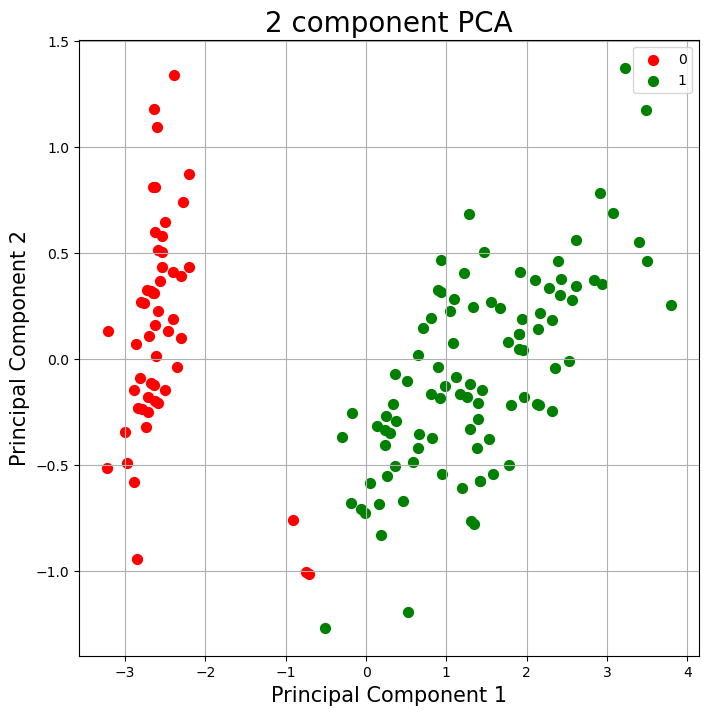

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()